# CHI 2018 Author and Reviewer Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

authors = pd.read_csv("../data/listOfAuthors-papers.csv", encoding='latin1', quotechar="\"", index_col='Paper-Author')

#Remove unnecessary fields
del authors['ins2']
del authors['middle_initial']

#Clean dataset
authors.email = authors.email.astype(str)
authors.email = authors.email.str.lower()

#Encode to UTF-8
authors.email = authors.email.str.strip()
authors.given_name = authors.given_name.str.strip()
authors.family_name = authors.family_name.str.strip()
authors.ins1 = authors.ins1.str.strip()

# authors.email = authors.email.str.decode('utf8').replace(' ', '')
# authors.given_name = authors.given_name.str.decode('utf8').replace(' ', '')
# authors.family_name = authors.family_name.str.decode('utf8').replace(' ', '')
# authors.ins1 = authors.ins1.str.decode('utf8').replace(' ', '')

authors

,decision,given_name,family_name,email,ins1
Paper-Author,,,,,
pn2678-1,QR,Keran,Zhao,kzhao23@uic.edu,"University of Illinois at Chicago, School of B..."
pn2678-2,QR,Yuheng,Hu,yuhenghu@uic.edu,"Department of Information and Decision System,..."
pn2515-1,R,Marcos,Serrano,marcos.serrano@irit.fr,"University of Toulouse & CNRS; IRIT, Toulouse,..."
pn2515-2,R,Florine,Simon,florine.simon@irit.fr,"University of Toulouse & CNRS; IRIT, Toulouse,..."
pn2515-3,R,Anne,Roudaut,anne.roudaut@bristol.ac.uk,"University of Bristol, Bristol, UK"
pn2515-4,R,Pourang,Irani,irani@cs.umanitoba.ca,"Department of Computer Science, University of ..."
pn3806-1,R,Daniel,Epstein,depstein@cs.washington.edu,"Computer Science & Engineering, University of ..."
pn3806-2,R,Koko,Nakajima,koko_nakajima@brown.edu,"Brown University, Providence, Rhode Island, Un..."
pn3806-3,R,Mira,Dontcheva,mirad@adobe.com,"Adobe Research, Seattle, Washington, United St..."


In [2]:
reviewers = pd.read_csv("../data/listOfReviewers-papers.csv", encoding='latin1', header=0, index_col='ID')
reviewers = reviewers.loc[:,['role','review_submitted','review_assigned','family_name','given_name','middle_initial','email','dep1','ins1', 'country1']]

#Clean dataset
reviewers.email = reviewers.email.astype(str)
reviewers.ins1 = reviewers.ins1.astype(str)
reviewers.country1 = reviewers.country1.astype(str)
reviewers.email = reviewers.email.str.lower()

#Encode to UTF-8
reviewers.email = reviewers.email.str.encode('utf8')
reviewers.ins1 = reviewers.ins1.str.replace("\"", "")
reviewers.country1 = reviewers.country1.str.replace("\"", "")
reviewers.ins1 = reviewers.ins1.str.strip()
reviewers.country1 = reviewers.country1.str.strip()

reviewers.email = reviewers.email.str.decode('utf8').replace('b"b\'', '').replace('\'"', '')

reviewers

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
ID,,,,,,,,,,
5619,reviewer,0,0,-,Vinayak,NaN,vinayak@tamu.edu,Department of Mechanical Engineering,Texas A&M University,United States
6524,reviewer,3,3,Edwards,Alistair,NaN,alistair@cs.york.ac.uk,NaN,University of York,United Kingdom
10150,reviewer,1,1,Nouwens,Midas,NaN,m.midas.m@gmail.com,ICT,Kungliga Tekniska HÃ¶gskolan,Sweden
5355,reviewer,3,3,Ge,Ni,NaN,dvsnigel@gmail.com,Human-Computer Interaction Institute,Carnegie Mellon University (CMU),USA
8005,reviewer,2,2,Rasmussen,Majken,NaN,mkirkegaard@cs.au.dk,NaN,,
10328,reviewer,1,1,Archambault,Leanna,NaN,leanna.archambault@asu.edu,Mary Lou Fulton Teachers College,Arizona State University,USA
7325,reviewer,0,0,A.B.M. Alim Al,Islam,NaN,razi_bd@yahoo.com,Department of Computer Science and Engineering,Bangladesh University of Engineering and Techn...,Bangladesh
7437,reviewer,1,1,Aal,Konstantin,NaN,konstantin.aal@uni-siegen.de,Institute for Information Systems,University of Siegen,Germany
9883,reviewer,0,0,Abdelnasser,Heba,NaN,heba.abdelnasser@alexu.edu.eg,"""""",,


# How many reviewers submitted less than assigned?

In [34]:
reviewers.query('review_submitted < review_assigned')

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
ID,,,,,,,,,,
7571,reviewer,0,1,Al-Jarrah,Ahmad,NaN,jarrah@nmsu.edu,Applied Science Department,Al-Balqa Applied University,Jordan
9226,reviewer,0,2,Astell,Arlene,NaN,aja3@st-and.ac.uk,NaN,,
8155,reviewer,0,1,Bakshy,Eytan,NaN,ebakshy@fb.com,NaN,Facebook,California
8112,reviewer,2,3,Benford,Steve,NaN,steve.benford@nottingham.ac.uk,Blah,The University of Nottingham,United Kingdom
8210,reviewer,0,1,BjÃ¶rk,Staffan,NaN,staffan.bjork@ait.gu.se,University of Gothenburg,University of Gothenburg,Sweden
5025,committee,17,18,Bulling,Andreas,NaN,bulling@mpi-inf.mpg.de,Max Planck Institute for Informatics,Saarland Informatics Campus,Germany
10351,reviewer,0,1,Casale,Michael,NaN,mbcasale@gmail.com,NaN,,
5018,committee,16,17,Cauchard,Jessica,R,jcauchard@acm.org,NaN,Interdisciplinary Center (IDC) Herzliya,Israel
10345,reviewer,0,1,Chignell,Mark,NaN,chignel@mie.utoronto.ca,Mechanical & Industrial Engineering,University of Toronto,Canada


In [4]:
reviewers.query('review_submitted < review_assigned').count()

role                46
review_submitted    46
review_assigned     46
family_name         46
given_name          46
middle_initial       4
email               46
dep1                24
ins1                46
country1            46
dtype: int64

In [5]:
reviewers.query('review_submitted < review_assigned').groupby('role').count()

,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
role,,,,,,,,,
committee,24,24,24,24,1,24,12,24,24
reviewer,22,22,22,22,3,22,12,22,22


In [6]:
reviewers.query('review_submitted < review_assigned').groupby('ins1').count()

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,country1
ins1,,,,,,,,,
,8,8,8,8,8,0,8,2,8
Al-Balqa Applied University,1,1,1,1,1,0,1,1,1
Arizona State University,1,1,1,1,1,0,1,0,1
Auburn University,1,1,1,1,1,0,1,1,1
Autodesk,1,1,1,1,1,0,1,1,1
Dalhousie University,1,1,1,1,1,0,1,1,1
Drexel University,2,2,2,2,2,0,2,1,2
Facebook,1,1,1,1,1,0,1,0,1
Georgia Institute of Technolgy,1,1,1,1,1,1,1,0,1


# How many reviewers did not submit at all?

In [7]:
reviewers.query('review_submitted == 0 & review_assigned > 0')

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
ID,,,,,,,,,,
7571,reviewer,0,1,Al-Jarrah,Ahmad,NaN,jarrah@nmsu.edu,Applied Science Department,Al-Balqa Applied University,Jordan
9226,reviewer,0,2,Astell,Arlene,NaN,aja3@st-and.ac.uk,NaN,,
8155,reviewer,0,1,Bakshy,Eytan,NaN,ebakshy@fb.com,NaN,Facebook,California
8210,reviewer,0,1,BjÃ¶rk,Staffan,NaN,staffan.bjork@ait.gu.se,University of Gothenburg,University of Gothenburg,Sweden
10351,reviewer,0,1,Casale,Michael,NaN,mbcasale@gmail.com,NaN,,
10345,reviewer,0,1,Chignell,Mark,NaN,chignel@mie.utoronto.ca,Mechanical & Industrial Engineering,University of Toronto,Canada
8678,committee,0,15,Drucker,Steven,NaN,sdrucker@microsoft.com,NaN,Microsoft Research,United States
9788,reviewer,0,1,Dykes,Thomas,NaN,thomas.dykes@northumbria.ac.uk,School of Design,Northumbria University,UK
8889,reviewer,0,1,Kristensson,Per Ola,NaN,kristensson@acm.org,NaN,,


In [8]:
reviewers.query('review_submitted == 0 & review_assigned > 0').groupby('role').count()

,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
role,,,,,,,,,
committee,2,2,2,2,0,2,1,2,2
reviewer,16,16,16,16,2,16,7,16,16


In [9]:
reviewers.query('review_submitted == 0 & review_assigned > 0').groupby('ins1').count()

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,country1
ins1,,,,,,,,,
,7,7,7,7,7,0,7,1,7
Al-Balqa Applied University,1,1,1,1,1,0,1,1,1
Auburn University,1,1,1,1,1,0,1,1,1
Facebook,1,1,1,1,1,0,1,0,1
Georgia Institute of Technolgy,1,1,1,1,1,1,1,0,1
Microsoft Research,1,1,1,1,1,0,1,0,1
Northeastern University,1,1,1,1,1,0,1,1,1
Northumbria University,1,1,1,1,1,0,1,1,1
Princeton University,1,1,1,1,1,1,1,1,1


In [10]:
reviewers.query('review_submitted == 0 & review_assigned > 0').groupby('ins1')['role'].count()

ins1
                                  7
Al-Balqa Applied University       1
Auburn University                 1
Facebook                          1
Georgia Institute of Technolgy    1
Microsoft Research                1
Northeastern University           1
Northumbria University            1
Princeton University              1
University of Gothenburg          1
University of Toronto             1
Yahoo                             1
Name: role, dtype: int64

In [11]:
reviewers.query('review_submitted == 0 & review_assigned > 0 & role == "reviewer"')

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
ID,,,,,,,,,,
7571,reviewer,0,1,Al-Jarrah,Ahmad,NaN,jarrah@nmsu.edu,Applied Science Department,Al-Balqa Applied University,Jordan
9226,reviewer,0,2,Astell,Arlene,NaN,aja3@st-and.ac.uk,NaN,,
8155,reviewer,0,1,Bakshy,Eytan,NaN,ebakshy@fb.com,NaN,Facebook,California
8210,reviewer,0,1,BjÃ¶rk,Staffan,NaN,staffan.bjork@ait.gu.se,University of Gothenburg,University of Gothenburg,Sweden
10351,reviewer,0,1,Casale,Michael,NaN,mbcasale@gmail.com,NaN,,
10345,reviewer,0,1,Chignell,Mark,NaN,chignel@mie.utoronto.ca,Mechanical & Industrial Engineering,University of Toronto,Canada
9788,reviewer,0,1,Dykes,Thomas,NaN,thomas.dykes@northumbria.ac.uk,School of Design,Northumbria University,UK
8889,reviewer,0,1,Kristensson,Per Ola,NaN,kristensson@acm.org,NaN,,
9081,reviewer,0,1,Litvinenko,Anna,NaN,anna.litvinenko@fu-berlin.de,NaN,,


In [12]:
reviewers.query('review_submitted == 0 & review_assigned > 0 & role == "committee"')

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
ID,,,,,,,,,,
8678,committee,0,15,Drucker,Steven,NaN,sdrucker@microsoft.com,NaN,Microsoft Research,United States
5001,committee,0,1,test,ac,NaN,ac-test@mspace.fm,wonderful ac place,,


In [13]:
reviewers.query('review_submitted == 0 & review_assigned > 0 & role == "reviewer"').groupby('review_assigned')['role'].count()

review_assigned
1    15
2     1
Name: role, dtype: int64

In [14]:
reviewers.query('review_submitted == 0 & review_assigned > 0 & role == "committee"').groupby('review_assigned')['role'].count()

review_assigned
1     1
15    1
Name: role, dtype: int64

In [15]:
reviewers.query('review_assigned == 0')

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
ID,,,,,,,,,,
5619,reviewer,0,0,-,Vinayak,NaN,vinayak@tamu.edu,Department of Mechanical Engineering,Texas A&M University,United States
7325,reviewer,0,0,A.B.M. Alim Al,Islam,NaN,razi_bd@yahoo.com,Department of Computer Science and Engineering,Bangladesh University of Engineering and Techn...,Bangladesh
9883,reviewer,0,0,Abdelnasser,Heba,NaN,heba.abdelnasser@alexu.edu.eg,"""""",,
7482,reviewer,0,0,Abdollahi,Hojjat,NaN,hojjat.abdollahi@gmail.com,ECE,University of Denver,United States
5906,reviewer,0,0,Abdul-Rahman,Alfie,NaN,alfie.abdulrahman@gmail.com,Oxford e-Research Centre,University of Oxford,United Kingdom
5377,reviewer,0,0,Abdulhamid,Najeeb,Gambo,najeebgambo.abdulhamid2@brunel.ac.uk,Computer Science,Brunel University London,United Kingdom
6237,reviewer,0,0,ABOU AMSHA,Khuloud,NaN,khuloud.abou_amsha@utt.fr,Tech-cico,Institut Charles Delaunay,France
8736,reviewer,0,0,Abouzied,Azza,NaN,azza@nyu.edu,New York University - Abu Dhabi,Abu Dhabi,United Arab Emirates
8316,reviewer,0,0,Abouzied,Azza,NaN,azza@berkeley.edu,NaN,,


In [16]:
reviewers.query('review_assigned == 0').groupby('dep1').count()

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,ins1,country1
dep1,,,,,,,,,
"""""",1,1,1,1,1,0,1,1,1
1409 12th Street,1,1,1,1,1,1,1,1,1
2063 KELLEY ENGINEERING,1,1,1,1,1,0,1,1,1
2830 Old Main Hill,1,1,1,1,1,0,1,1,1
3710 McClintock Ave,1,1,1,1,1,0,1,1,1
4259 Nagatsuta cho Midori ku,1,1,1,1,1,1,1,1,1
AAU UMR CNRS 1563 - CRENAU,1,1,1,1,1,0,1,1,1
ACEMS & IFE,1,1,1,1,1,0,1,1,1
ADAPT Centre,2,2,2,2,2,1,2,2,2


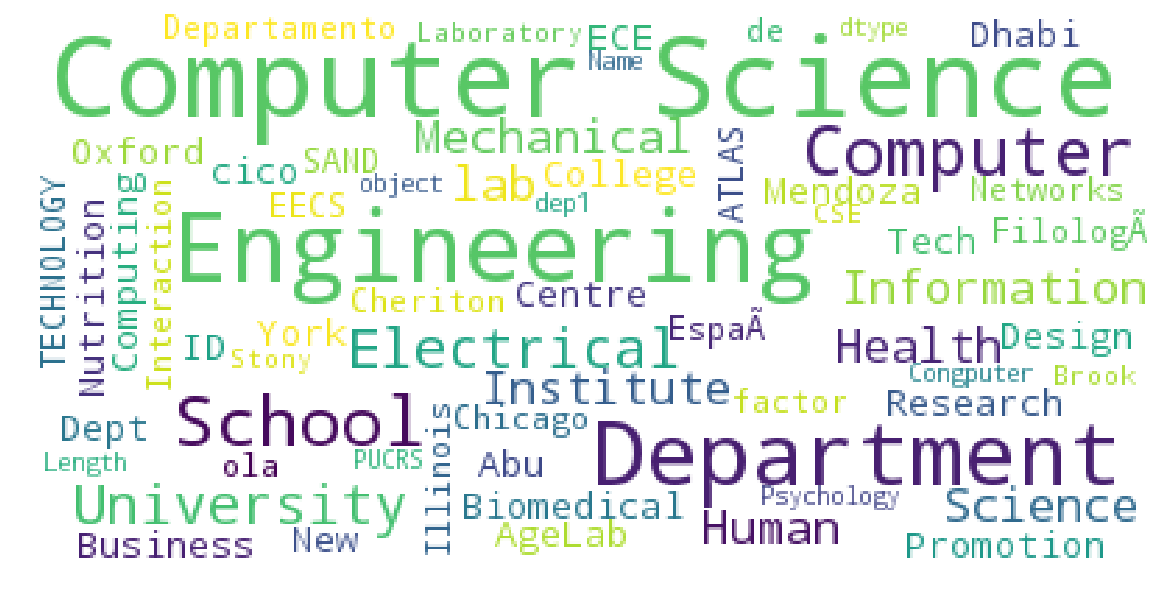

In [17]:
# https://www.kaggle.com/y983zhan/word-cloud-with-python

stopwords = set(STOPWORDS)
stopwords.add('NaN')

reviewer_notassigned_dept_wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=200, 
                          random_state=42
                         ).generate(str(reviewers.query('review_assigned == 0')['dep1']))

mpl.rcParams['figure.figsize']=(20.0,20.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=900             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

reviewer_notassigned_dept_fig = plt.figure(1)
plt.imshow(reviewer_notassigned_dept_wordcloud)
plt.axis('off')
plt.show()
reviewer_notassigned_dept_fig.savefig("reviewer_notassigned_dept_fig.png", dpi=900)

In [18]:
reviewers.query('review_assigned == 0').groupby('role').count()

,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,ins1,country1
role,,,,,,,,,
committee,28,28,28,28,4,28,16,28,28
reviewer,2267,2267,2267,2267,386,2267,1492,2267,2267


In [19]:
reviewers.query('review_assigned == 0').groupby('ins1').count()

,role,review_submitted,review_assigned,family_name,given_name,middle_initial,email,dep1,country1
ins1,,,,,,,,,
,336,336,336,336,336,46,336,60,336
-,1,1,1,1,1,0,1,1,1
-University of Nottingham,1,1,1,1,1,0,1,1,1
1x1 Design,1,1,1,1,1,0,1,0,1
2-2-2 Hikaridai Keihanna Science City,1,1,1,1,1,0,1,1,1
AIT - Austrian Institute of Technology GmbH,1,1,1,1,1,0,1,0,1
AT&T Labs Research,1,1,1,1,1,0,1,0,1
Aalborg Uniiversity Copenhagen,1,1,1,1,1,0,1,1,1
Aalborg University,7,7,7,7,7,1,7,5,7


# How did the authors review?

Out of all the authors who submitted, how many were assigned reviews? How many submitted reviews? Are we utilizing all the authors for the review process?

First, let's get the authors that were assigned papers to review.

In [20]:
#Clean data
unique_authors = pd.DataFrame({'email': authors.groupby('email').decision.count().keys(), 'submissions': authors.groupby('email').decision.count().values})
unique_authors.email = unique_authors.email.astype(str)
unique_authors.email = unique_authors.email.str.strip()
unique_authors

,email,submissions
0,0816211@zju.edu.cn,2
1,1149447426@qq.com,1
2,1173901622@qq.com,1
3,1220kazu1412@gmail.com,5
4,14030031@lums.edu.pk,1
5,14bce098@nirmauni.ac.in,1
6,15030043@lums.edu.pk,1
7,15030044@lums.edu.pk,1
8,16022839@brookes.ac.uk,1
9,16030041@lums.edu.pk,1


In [21]:
# unique_authors = pd.DataFrame(authors.email.unique(), columns=['email'])

# Authors who were assigned papers to review
# author_reviewers = pd.merge(unique_authors, reviewers, left_on='email', right_on='email', how='outer').query('review_assigned > 0').sort_values(by=['email'])

# unique_authors.at[7142, 'email'].replace(' ', '') == reviewers.at[5765, 'email']

# author_reviewers_raw = reviewers[reviewers.email.isin(reviewers.email == '0816211@zju.edu.cn')]
# reviewers[reviewers['email'] == 'zzhaoao@connect.ust.hk']
# unique_authors[unique_authors['email'] == 'zzhaoao@connect.ust.hk']

In [22]:
#All authors who appeared in the Reviewer database.
author_reviewers_raw = pd.merge(unique_authors, reviewers, left_on='email', right_on='email', how='inner')
author_reviewers_raw

,email,submissions,role,review_submitted,review_assigned,family_name,given_name,middle_initial,dep1,ins1,country1
0,16022839@brookes.ac.uk,1,reviewer,0,0,Vovk,Alla,NaN,Performance Augmentation Lab,Oxford Brookes University,United Kingdom
1,a.a.a.alarfaj2@ncl.ac.uk,1,reviewer,0,0,Alarfaj,Aisha,Ahmed,School of Computing,Newcastle University,United Kingdom
2,a.alomainy@qmul.ac.uk,1,reviewer,0,0,Alomainy,Akram,NaN,School of Electronic Engineering and Computer ...,Queen Mary,
3,a.ambe@qut.edu.au,2,reviewer,0,0,Ambe,Aloha,Hufana,NaN,Queensland University of Technology,Australia
4,a.ayobi@cs.ucl.ac.uk,1,reviewer,4,4,Ayobi,Amid,NaN,UCL Interaction Centre,University College London,United Kingdom
5,a.blandford@ucl.ac.uk,3,reviewer,1,1,Blandford,Ann,E,NaN,University College London,United Kingdom
6,a.boucher@gold.ac.uk,1,reviewer,1,1,Boucher,Andy,NaN,"Interaction Research Studio, Goldsmiths, Unive...",,
7,a.bowyer2@newcastle.ac.uk,1,reviewer,0,0,Bowyer,Alex,NaN,Open Lab,Newcastle University,United Kingdom
8,a.everitt@lancaster.ac.uk,3,reviewer,3,3,Everitt,Aluna,NaN,School of Computing and Communications,Lancaster Universty,United Kingdom
9,a.joinson@bath.ac.uk,1,reviewer,0,0,Joinson,Adam,NaN,NaN,University of Bath,United Kingdom


In [23]:
author_reviewers = author_reviewers_raw.query('review_assigned > 0').sort_values(by=['email'])
print("==============Authors who were assigned as reviewers===============\n")
print("Author reviewers: ", author_reviewers.email.count())
print("Average papers assigned per author: ", author_reviewers.review_assigned.mean())
print("Average submissions per reviewer: ", author_reviewers.review_submitted.mean())

==============Authors who were assigned as reviewers===============

Author reviewers:  1323
Average papers assigned per author:  4.578231292517007
Average submissions per reviewer:  4.546485260770975


In [24]:
author_reviewers

,email,submissions,role,review_submitted,review_assigned,family_name,given_name,middle_initial,dep1,ins1,country1
4,a.ayobi@cs.ucl.ac.uk,1,reviewer,4,4,Ayobi,Amid,NaN,UCL Interaction Centre,University College London,United Kingdom
5,a.blandford@ucl.ac.uk,3,reviewer,1,1,Blandford,Ann,E,NaN,University College London,United Kingdom
6,a.boucher@gold.ac.uk,1,reviewer,1,1,Boucher,Andy,NaN,"Interaction Research Studio, Goldsmiths, Unive...",,
8,a.everitt@lancaster.ac.uk,3,reviewer,3,3,Everitt,Aluna,NaN,School of Computing and Communications,Lancaster Universty,United Kingdom
10,a.malizia@herts.ac.uk,1,reviewer,1,1,Malizia,Alessio,NaN,School of creative arts,University of Hertfordshire,United Kingdom
11,a.parker@neu.edu,3,reviewer,4,4,Parker,Andrea,NaN,College of Computer & Information Science,Northeastern University,United States
13,a.puussaar2@ncl.ac.uk,1,reviewer,1,1,Puussaar,Aare,NaN,Open Lab,Newcastle University,United Kingdom
14,a.r.dow@ncl.ac.uk,2,reviewer,1,1,Dow,Andy,NaN,Open Lab,Newcastle University,United Kingdom
17,a.schlesinger@gatech.edu,1,reviewer,2,2,Schlesinger,Ari,NaN,School of Interactive Computing,Georgia Institute of Technology,United States
18,a.steed@ucl.ac.uk,1,reviewer,3,3,Steed,Anthony,NaN,NaN,University College London,United Kingdom


In [41]:
author_reviewers_prob = author_reviewers_raw.query('review_assigned > 0 & review_submitted < review_assigned')
print("==============Author reviewers who submitted less than assigned===============\n")
print("Author reviewers: ", author_reviewers_prob.email.count())
print("Average papers assigned per author: ", author_reviewers_prob.review_assigned.mean())
print("Average submissions per reviewer: ", author_reviewers_prob.review_submitted.mean())

==============Author reviewers who submitted less than assigned===============

Author reviewers:  25
Average papers assigned per author:  13.28
Average submissions per reviewer:  11.6


In [42]:
author_reviewers_prob

,email,submissions,role,review_submitted,review_assigned,family_name,given_name,middle_initial,dep1,ins1,country1
77,aleksarc@drexel.edu,2,committee,18,19,Sarcevic,Aleksandra,NaN,NaN,Drexel University,United States
93,alice.oh@kaist.edu,1,committee,16,17,Oh,Alice,NaN,NaN,KAIST,Republic of Korea
244,bjoern@eecs.berkeley.edu,4,reviewer,5,7,Hartmann,BjÃ¶rn,NaN,NaN,University of California,California
272,bulling@mpi-inf.mpg.de,7,committee,17,18,Bulling,Andreas,NaN,Max Planck Institute for Informatics,Saarland Informatics Campus,Germany
318,cearto@berkeley.edu,1,reviewer,5,6,Torres,Cesar,A,Electrical Engineering and Computer Science,University of California,California
373,clatulip@uncc.edu,1,committee,16,17,Latulipe,Celine,NaN,NaN,University of North Carolina at Charlotte,United States
485,djcran@indiana.edu,2,reviewer,1,2,Crandall,David,NaN,"School of Informatics, Computing, and Engineering",Indiana University,United States
526,ebakshy@fb.com,1,reviewer,0,1,Bakshy,Eytan,NaN,NaN,Facebook,California
574,erin.a.walker@asu.edu,1,committee,16,17,Walker,Erin,NaN,NaN,Arizona State University,United States
680,gmarcu@drexel.edu,2,committee,16,17,Marcu,Gabriela,NaN,College of Computing and Informatics,Drexel University,United States


In [43]:
author_reviewers_more = author_reviewers_raw.query('review_assigned > 0 & review_submitted >= review_assigned')
print("==============Author reviewers who submitted more than assigned===============\n")
print("Author reviewers: ", author_reviewers_more.email.count())
print("Average papers assigned per author: ", author_reviewers_more.review_assigned.mean())
print("Average submissions per reviewer: ", author_reviewers_more.review_submitted.mean())

==============Author reviewers who submitted more than assigned===============

Author reviewers:  1298
Average papers assigned per author:  4.410631741140215
Average submissions per reviewer:  4.410631741140215


In [44]:
author_reviewers_more

,email,submissions,role,review_submitted,review_assigned,family_name,given_name,middle_initial,dep1,ins1,country1
4,a.ayobi@cs.ucl.ac.uk,1,reviewer,4,4,Ayobi,Amid,NaN,UCL Interaction Centre,University College London,United Kingdom
5,a.blandford@ucl.ac.uk,3,reviewer,1,1,Blandford,Ann,E,NaN,University College London,United Kingdom
6,a.boucher@gold.ac.uk,1,reviewer,1,1,Boucher,Andy,NaN,"Interaction Research Studio, Goldsmiths, Unive...",,
8,a.everitt@lancaster.ac.uk,3,reviewer,3,3,Everitt,Aluna,NaN,School of Computing and Communications,Lancaster Universty,United Kingdom
10,a.malizia@herts.ac.uk,1,reviewer,1,1,Malizia,Alessio,NaN,School of creative arts,University of Hertfordshire,United Kingdom
11,a.parker@neu.edu,3,reviewer,4,4,Parker,Andrea,NaN,College of Computer & Information Science,Northeastern University,United States
13,a.puussaar2@ncl.ac.uk,1,reviewer,1,1,Puussaar,Aare,NaN,Open Lab,Newcastle University,United Kingdom
14,a.r.dow@ncl.ac.uk,2,reviewer,1,1,Dow,Andy,NaN,Open Lab,Newcastle University,United Kingdom
17,a.schlesinger@gatech.edu,1,reviewer,2,2,Schlesinger,Ari,NaN,School of Interactive Computing,Georgia Institute of Technology,United States
18,a.steed@ucl.ac.uk,1,reviewer,3,3,Steed,Anthony,NaN,NaN,University College London,United Kingdom


In [35]:
# Authors who were NOT assigned any papers to review
author_only = author_reviewers_raw.query('review_assigned == 0')
print("==============Author reviewers who were not assigned===============\n")
print("Authors: ", author_only.email.count())

==============Author reviewers who were not assigned===============

Authors:  719


In [28]:
author_only

,email,submissions,role,review_submitted,review_assigned,family_name,given_name,middle_initial,dep1,ins1,country1
0,16022839@brookes.ac.uk,1,reviewer,0,0,Vovk,Alla,NaN,Performance Augmentation Lab,Oxford Brookes University,United Kingdom
1,a.a.a.alarfaj2@ncl.ac.uk,1,reviewer,0,0,Alarfaj,Aisha,Ahmed,School of Computing,Newcastle University,United Kingdom
2,a.alomainy@qmul.ac.uk,1,reviewer,0,0,Alomainy,Akram,NaN,School of Electronic Engineering and Computer ...,Queen Mary,
3,a.ambe@qut.edu.au,2,reviewer,0,0,Ambe,Aloha,Hufana,NaN,Queensland University of Technology,Australia
7,a.bowyer2@newcastle.ac.uk,1,reviewer,0,0,Bowyer,Alex,NaN,Open Lab,Newcastle University,United Kingdom
9,a.joinson@bath.ac.uk,1,reviewer,0,0,Joinson,Adam,NaN,NaN,University of Bath,United Kingdom
12,a.preston@kingston.ac.uk,1,reviewer,0,0,Preston,Anne,NaN,Learning and Teaching Enhancement Centre,Kingston University,United Kingdom
15,a.reinschluessel@gmail.com,2,reviewer,0,0,Reinschluessel,Anke,Verena,Human Computer Interaction Lab,University of Saskatchewan,Canada
16,a.sasse@cs.ucl.ac.uk,3,reviewer,0,0,Sasse,Martina Angela,NaN,NaN,University College London,United Kingdom
19,a.strohmayer@newcastle.ac.uk,3,reviewer,0,0,Strohmayer,Angelika,NaN,Open Lab,Newcastle University,United Kingdom


In [45]:
reviewassigned_per_role = author_reviewers.groupby(['review_assigned', 'review_submitted', 'role'])
reviewassigned_per_role.count()

email  submissions  family_name  \
review_assigned review_submitted role                                         
1               0                reviewer       2            2            2   
                1                committee      7            7            7   
                                 reviewer     466          466          466   
2               1                reviewer       2            2            2   
                2                committee      3            3            3   
                                 reviewer     255          255          255   
3               2                reviewer       1            1            1   
                3                committee      1            1            1   
                                 reviewer     150          150          150   
4               4                reviewer     123          123          123   
5               5                reviewer      55           55           55   
6               5                reviewer       1            1            1   
                6                reviewer      31           31           31   
7               5                reviewer       1            1            1   
                7                reviewer      14           14           14   
8               8                reviewer       6            6            6   
9               9                reviewer       5            5            5   
10              10               reviewer       2            2            2   
12              12               reviewer       1            1            1   
13              13               committee      1            1            1   
                                 reviewer       1            1            1   
15              0                committee      1            1            1   
                15               committee      7            7            7   
16              14               committee      1            1            1   
                15               committee      2            2            2   
                16               committee     46           46           46   
17              16               committee      8            8            8   
                17               committee     50           50           50   
18              17               committee      4            4            4   
                18               committee     40           40           40   
19              18               committee      1            1            1   
                19               committee     17           17           17   
20              18               committee      1            1            1   
                20               committee     12           12           12   
21              21               committee      3            3            3   
22              22               committee      2            2            2   

                                            given_name  middle_initial  dep1  \
review_assigned review_submitted role                                          
1               0                reviewer            2               0     0   
                1                committee           7               3     3   
                                 reviewer          466              75   354   
2               1                reviewer            2               0     2   
                2                committee           3               0     1   
                                 reviewer          255              51   195   
3               2                reviewer            1               0     1   
                3                committee           1               0     0   
                                 reviewer          150              18   102   
4               4                reviewer          123              27    81   
5               5                reviewer           55              16    32   
6

In [46]:
# plt.style.use('ggplot')
author_reviewers_prob_toplot = author_reviewers_prob.groupby(['review_assigned', 'review_submitted'])
author_reviewers_prob_toplot.count()
# list(author_reviewers_prob_toplot['role'].count())

email  submissions  role  family_name  \
review_assigned review_submitted                                          
1               0                     2            2     2            2   
2               1                     2            2     2            2   
3               2                     1            1     1            1   
6               5                     1            1     1            1   
7               5                     1            1     1            1   
15              0                     1            1     1            1   
16              14                    1            1     1            1   
                15                    2            2     2            2   
17              16                    8            8     8            8   
18              17                    4            4     4            4   
19              18                    1            1     1            1   
20              18                    1            1     1            1   

                                  given_name  middle_initial  dep1  ins1  \
review_assigned review_submitted                                           
1               0                          2               0     0     2   
2               1                          2               0     2     2   
3               2                          1               0     1     1   
6               5                          1               1     1     1   
7               5                          1               0     0     1   
15              0                          1               0     0     1   
16              14                         1               0     0     1   
                15                         2               0     1     2   
17              16                         8               0     2     8   
18              17                         4               0     4     4   
19              18                         1               0     0     1   
20              18                         1               0     1     1   

                                  country1  
review_assigned review_submitted            
1               0                        2  
2               1                        2  
3               2                        1  
6               5                        1  
7               5                        1  
15              0                        1  
16              14                       1  
                15                       2  
17              16                       8  
18              17                       4  
19              18                       1  
20              18                       1

# How many authors reviewed less than their submissions?

In [31]:
author_reviewers_less_sub = author_reviewers.query('submissions > review_submitted')
author_reviewers_less_sub

,email,submissions,role,review_submitted,review_assigned,family_name,given_name,middle_initial,dep1,ins1,country1
5,a.blandford@ucl.ac.uk,3,reviewer,1,1,Blandford,Ann,E,NaN,University College London,United Kingdom
14,a.r.dow@ncl.ac.uk,2,reviewer,1,1,Dow,Andy,NaN,Open Lab,Newcastle University,United Kingdom
21,a.vasalou@ucl.ac.uk,2,reviewer,1,1,Vasalou,Asimina,NaN,Institute of Education - UCL Knowledge Lab,University College London,United Kingdom
31,abigale.stangl@colorado.edu,2,reviewer,1,1,Stangl,Abigale,NaN,NaN,University of Colorado-Boulder,United States
36,ackerm@umich.edu,3,reviewer,1,1,Ackerman,Mark,S.,NaN,University of Michigan,United States
37,acm@jofish.com,5,reviewer,1,1,Kaye,Jofish,NaN,NaN,Yahoo,United States
47,adrian.hazzard@nottingham.ac.uk,2,reviewer,1,1,Hazzard,Adrian,NaN,Mixed Reality Lab - School of Computer Science,University of Nottingham,England
54,afrodrigues@fc.ul.pt,2,reviewer,1,1,Rodrigues,AndrÃ©,NaN,"LaSIGE, University of Lisbon, Lisbon, Portugal",University of Lisbon,Portugal
56,agha.ali.raza@gmail.com,5,reviewer,2,2,Raza,Agha Ali,NaN,Computer Science,Information Technology University,Punjab
73,alan.chamberlain@nottingham.ac.uk,2,reviewer,1,1,Chamberlain,Alan,NaN,Mixed Reality Lab,The University of Nottingham,United Kingdom


In [32]:
author_reviewers_less_sub_assigned = author_reviewers.query('submissions > review_submitted & review_submitted < review_assigned')
author_reviewers_less_sub_assigned

,email,submissions,role,review_submitted,review_assigned,family_name,given_name,middle_initial,dep1,ins1,country1
485,djcran@indiana.edu,2,reviewer,1,2,Crandall,David,NaN,"School of Informatics, Computing, and Engineering",Indiana University,United States
526,ebakshy@fb.com,1,reviewer,0,1,Bakshy,Eytan,NaN,NaN,Facebook,California
1381,netta.iivari@oulu.fi,2,reviewer,0,1,Livari,Netta,NaN,NaN,,
1671,sdrucker@microsoft.com,2,committee,0,15,Drucker,Steven,NaN,NaN,Microsoft Research,United States
1785,steve.benford@nottingham.ac.uk,9,reviewer,2,3,Benford,Steve,NaN,Blah,The University of Nottingham,United Kingdom
